In [3]:
from scipy import signal
from scipy import misc
import numpy as np

In [4]:
face = misc.face(gray=True) - misc.face(gray=True).mean()
template = np.copy(face[300:365, 670:750])  # right eye
template -= template.mean()
face = face + np.random.randn(*face.shape) * 50  # add noise
corr = signal.correlate2d(face, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

In [8]:
print (face, len(face))

(array([[  12.02154103,   31.50299109,  116.31112001, ...,   56.38713754,
         -48.96970131,   20.29025651],
       [ -26.0331099 ,  -16.74018618,   67.43502228, ...,    6.19107604,
          33.55143407,   68.63701381],
       [ -69.36747805,  -41.39458626,   81.89493846, ...,   15.54174204,
          53.65404996,  -95.53958295],
       ...,
       [  43.60284377, -126.55863619,  -15.41371392, ...,   39.18166929,
          46.87374998, -156.88585716],
       [  62.23999749,  -18.88710405,  -46.96569098, ...,  103.22602376,
           6.7350792 ,   27.05681858],
       [ -14.14324029,   -1.33581201,   12.36645624, ...,  -54.8943781 ,
          68.0055996 ,   66.74151327]]), 768)


In [9]:
print(template, len(template))

(array([[ -5.27576923,  -8.27576923,  10.72423077, ..., 134.72423077,
        133.72423077, 135.72423077],
       [ -6.27576923,  -7.27576923,   5.72423077, ..., 123.72423077,
        124.72423077, 128.72423077],
       [  7.72423077,  15.72423077,  27.72423077, ..., 123.72423077,
        122.72423077, 124.72423077],
       ...,
       [ 60.72423077,  67.72423077,  50.72423077, ..., -35.27576923,
        -39.27576923, -41.27576923],
       [ 47.72423077,  47.72423077,  37.72423077, ..., -32.27576923,
        -35.27576923, -37.27576923],
       [ 33.72423077,  25.72423077,  22.72423077, ..., -31.27576923,
        -34.27576923, -34.27576923]]), 65)


/home/dedeco/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/dedeco/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/dedeco/envs/tensorflow/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/dedeco/envs/tensorflow/local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line

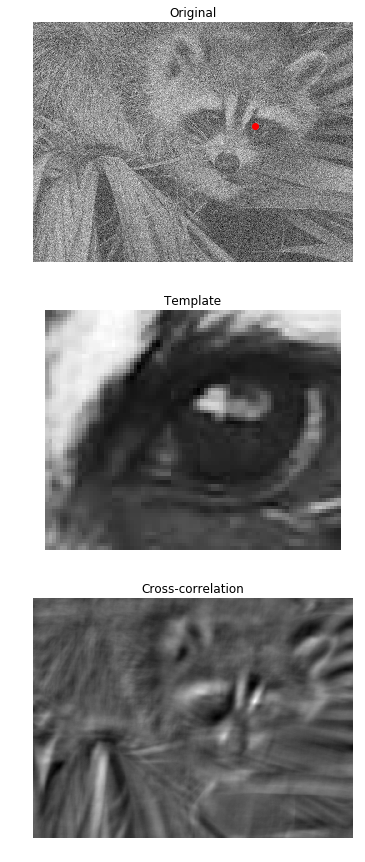

In [16]:
import matplotlib
matplotlib.use('TkAgg')
fig, (ax_orig, ax_template, ax_corr) = matplotlib.pyplot.subplots(3, 1,figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()